In [1]:
import sys
import pickle
sys.path.append('./preprocessors/')

In [2]:
from feature_format import featureFormat, targetFeatureSplit

In [3]:
dictionary = pickle.load(open("./final_project/final_project_dataset_modified.pkl", "r"))

In [29]:
features_list = ["bonus", "salary"]
data = featureFormat(dictionary, features_list, remove_any_zeroes=True)
sort_keys = './data/python2_lesson06_keys.pkl'
target, features = targetFeatureSplit(data)
print target[:10]
print features[:10]

[600000.0, 1200000.0, 350000.0, 1500000.0, 325000.0, 2600000.0, 400000.0, 788750.0, 850000.0, 700000.0]
[array([ 365788.]), array([ 267102.]), array([ 170941.]), array([ 243293.]), array([ 267093.]), array([ 370448.]), array([ 197091.]), array([ 288589.]), array([ 248546.]), array([ 257486.])]


In [30]:
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "r"
test_color = "b"

In [31]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Plot regression model

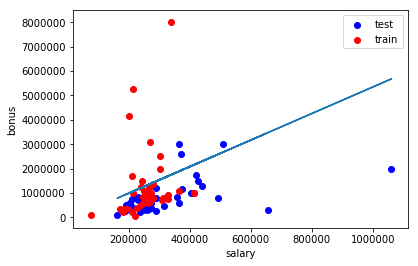

[-102360.54329388]
[ 5.44814029]


In [44]:
import matplotlib.pyplot as plt
# plot test points
for feature, target in zip(feature_test, target_test):
    plt.scatter(feature, target, color=test_color)
# plot training points
for feature, target in zip(feature_train, target_train):
    plt.scatter(feature, target, color=train_color)
    
# add legend title
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_train[0], target_train[0], color=train_color, label="train")

# plot the regression line
try:
    plt.plot(feature_test, reg.predict(feature_test))
except NameError:
    pass

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

print(reg.predict(0))
slope = (reg.predict(10) - reg.predict(0))/10
print slope

In [49]:
print reg.score(feature_train, target_train)
print reg.score(feature_test, target_test)

0.0455091926995
-1.48499241737


## Compare Salary vs Long term bonus

In [53]:
new_features_list = ['bonus','long_term_incentive']
new_data = featureFormat(dictionary, new_features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit(new_data)
print target[:10]
print features[:10]
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "r"
test_color = "b"

[1200000.0, 1500000.0, 2600000.0, 850000.0, 700000.0, 1100000.0, 850000.0, 2000000.0, 250000.0, 1000000.0]
[array([ 1586055.]), array([ 1617011.]), array([ 694862.]), array([ 831809.]), array([ 476451.]), array([ 1725545.]), array([ 540751.]), array([ 554422.]), array([ 180250.]), array([ 369721.])]


In [54]:
newReg = linear_model.LinearRegression()
newReg.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

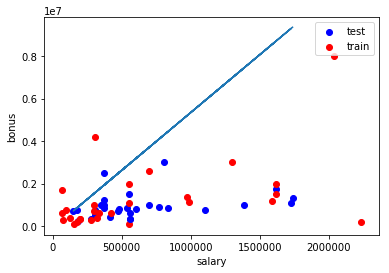

[-102360.54329388]
[ 5.44814029]


In [55]:
# plot test points
for feature, target in zip(feature_test, target_test):
    plt.scatter(feature, target, color=test_color)
# plot training points
for feature, target in zip(feature_train, target_train):
    plt.scatter(feature, target, color=train_color)
    
# add legend title
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_train[0], target_train[0], color=train_color, label="train")

# plot the regression line
try:
    plt.plot(feature_test, reg.predict(feature_test))
except NameError:
    pass

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

print(reg.predict(0))
slope = (reg.predict(10) - reg.predict(0))/10
print slope

In [56]:
print newReg.score(feature_train, target_train)
print newReg.score(feature_test, target_test)

0.217085971258
-0.59271289995


### Long term incentive is clearly a better feature, since we get a better score